In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from utils import get_X_y, get_test
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.metrics import roc_auc_score
def get_metrics(y_pred, y_targ, y_prob):
    auc = roc_auc_score(y_targ, y_prob)
    num = get_num(y_pred, y_targ)
    asy1 = get_ASY(y_pred, y_targ, p=[-9, 9, 1, 0])
    asy2 = get_ASY(y_pred, y_targ, p=[-1, 3, 2, -1])
    return auc, num, asy1, asy2
def get_num(y_pred, y_targ):
    return np.sum(y_pred != y_targ)
def get_ASY(y_pred, y_targ, p=[-1, 1, 1, -1]):
    TP = np.sum((y_pred == 1) & (y_targ == 1))
    FP = np.sum((y_pred == 1) & (y_targ == 0))
    FN = np.sum((y_pred == 0) & (y_targ == 1))
    TN = np.sum((y_pred == 0) & (y_targ == 0))
    return p[0]*TP + p[1]*FP + p[2]*FN + p[3]*TN

In [4]:
print(X.shape)
print(X_test.shape)

(300000, 100)
(10000, 100)


In [3]:
X, y = get_X_y(4, False)
X_test = get_test(4)

In [4]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,...,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,3.938937e+06,1.911572e+06,-3.467127e+06,-4.312840e+06,-4.348582e+06,-1.481607e+06,2.307066e+06,6.909317e+06,-2.143492e+04,-2.966032e+05,...,1.677129e+05,-1.177341e+07,-3.290374e+06,-9.870057e+05,2.679747e+06,3.234503e+06,-5.198815e+06,-1.509889e+07,9.614677e+06,-1.599516e+05
std,3.602707e+08,1.589207e+08,1.789703e+08,5.667498e+07,1.496031e+08,4.838315e+08,3.738963e+08,2.870808e+08,1.071691e+06,1.284899e+07,...,8.847647e+07,4.508295e+08,8.204088e+07,4.922682e+07,2.275603e+08,2.285660e+08,2.067980e+08,3.464697e+08,3.725261e+08,1.722912e+08
min,-3.824875e+09,-1.555730e+09,-2.699982e+09,-7.554084e+08,-1.729882e+09,-8.587016e+09,-4.130166e+09,-3.377235e+09,-1.473452e+07,-2.113359e+08,...,-1.012240e+09,-6.688468e+09,-9.849458e+08,-1.086363e+09,-2.773362e+09,-2.004522e+09,-4.114665e+09,-5.202435e+09,-5.155811e+09,-3.841067e+09
25%,-1.086754e+04,-3.666775e+03,-5.343871e+03,-1.976146e+03,-6.431658e+03,-1.497583e+04,-8.743789e+03,-1.031894e+04,-3.939674e+01,-3.012568e+02,...,-3.427820e+03,-1.234582e+04,-2.228655e+03,-1.449131e+03,-5.103335e+03,-7.781609e+03,-5.907042e+03,-9.275523e+03,-9.509841e+03,-7.411540e+03
50%,-3.808173e+02,-2.260446e+01,2.412107e+02,-7.665570e+01,-2.052243e+02,7.942315e+01,2.528164e+02,1.028106e+02,-5.647726e-01,-4.214405e+00,...,1.416486e+02,4.255457e+01,-5.582057e+01,-3.731403e+01,-1.870817e+02,-8.490919e+02,2.731066e+02,1.757250e+02,9.281942e+02,-3.013215e+01
75%,1.041967e+04,3.169991e+03,5.537655e+03,1.772880e+03,6.155744e+03,1.479348e+04,8.256316e+03,1.099008e+04,3.940864e+01,2.779611e+02,...,3.732551e+03,1.231074e+04,2.070838e+03,1.437997e+03,4.850814e+03,6.117915e+03,6.836393e+03,8.683398e+03,1.013854e+04,7.722512e+03
max,5.543508e+09,3.333552e+09,2.118813e+09,4.373286e+08,2.303394e+09,4.102842e+09,6.845845e+09,4.890645e+09,8.313262e+06,1.284774e+08,...,1.226696e+09,4.687053e+09,8.374555e+08,4.236903e+08,3.001487e+09,3.723436e+09,2.728100e+09,2.533092e+09,5.824178e+09,1.889578e+09


<Axes: >

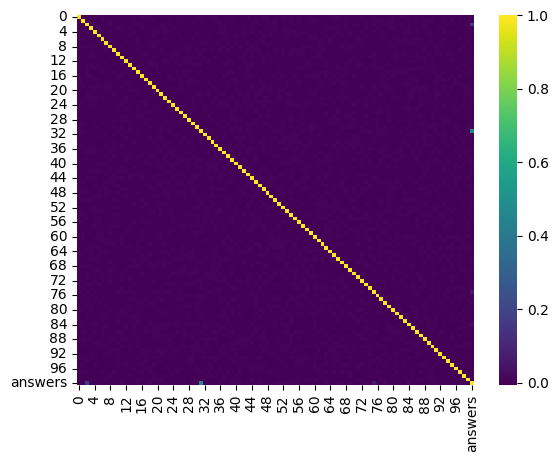

In [6]:
data = X.copy()
data['answers'] = y.values
sns.heatmap(data.corr(), cmap="viridis")

In [4]:
from scipy.stats import shapiro
from scipy.stats import norm
def print_shapiro(df):
    for col in df.columns:
        x = df[col].values
        shapiro_p = shapiro(x)[0]
        mu, std = norm.fit(x)
        print(f"P_val: {round(shapiro_p, 3)}, N({round(mu, 2)}, {round(std, 2)})")

def print_KLdiv(df, y):
    kulback = []
    mask0 = ((y==0).values)[:, 0]
    mask1 = ((y==1).values)[:, 0]
    for col in df.columns:
        x0 = df[col][mask0].values
        x1 = df[col][mask1].values
        shapiro_p0 = shapiro(x0)[0]
        shapiro_p1 = shapiro(x1)[0]
        mu0, std0 = norm.fit(x0)
        mu1, std1 = norm.fit(x1)
        kl = np.log(std1/std0) + (std0**2 + (mu0 - mu1)**2)/(2 * std1**2) - 0.5
        #print(f"KL_div: {round(kl, 3)}, Shapiro_ps: ({round(shapiro_p0, 3)}, {round(shapiro_p1, 3)}), N({round(mu0, 3)}, {round(std0, 3)}), N({round(mu1, 3)}, {round(std1, 3)})")
        kulback.append(kl)
    return kulback

In [5]:
def new_gen_feature(X, y, X_test, columns):
    mask0 = ((y==0).values)[:, 0]
    mask1 = ((y==1).values)[:, 0]

    
    new_df = pd.DataFrame(columns=['xuy'])
    new_df['xuy'] = np.zeros(X.shape[0])
    new_df_test = pd.DataFrame(columns=['xuy'])
    new_df_test['xuy'] = np.zeros(X_test.shape[0])
    kls, mu0s, std0s, mu1s, std1s = [], [], [], [], []
    
    for col in columns:
        x0 = X[col][mask0].values
        x1 = X[col][mask1].values
        
        mu0, std0 = norm.fit(x0)
        mu1, std1 = norm.fit(x1)
        kl = float(np.log(std1/std0) + (std0**2 + (mu0 - mu1)**2)/(2 * std1**2) - 0.5)
        kls.append(kl)
        mu0s.append(mu0)
        std0s.append(std0)
        mu1s.append(mu1)
        std1s.append(std1)
        
        new_df['xuy'] += np.sin(kl)*np.sign(mu1 - mu0)*X[col]/len(columns) 
        new_df_test['xuy'] += np.sin(kl)*np.sign(mu1 - mu0)*X_test[col]/len(columns)
    
    return new_df, new_df_test

In [18]:
df, df_test = new_gen_feature(df, y, df_test, columns=top_kulback)

In [ ]:
KL = print_KLdiv(X, y)
top_kulback = X.columns[np.argsort(np.array(KL))][::-1]

In [ ]:
KL = print_KLdiv(df, y)
top_kulback = X.columns[np.argsort(np.array(KL))][::-1]
df, df_test = new_gen_feature(df, y, df_test, columns=top_kulback)

In [12]:
np.sum(y.values)/len(y)

0.164

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [7]:
def remove_outliers(X_, X_test_, y, alpha=0.05, shapiro_p0=0.97, shapiro_p1=0.97, th_left=3, th_right=3):
    X = X_.copy()
    X_test = X_test_.copy()
    mask0 = ((y==0).values)[:, 0]
    mask1 = ((y==1).values)[:, 0]
        
    for col in X.columns:
        x0 = X[col][mask0].values
        x1 = X[col][mask1].values
        if (shapiro(x0)[0] > shapiro_p0 and shapiro(x1)[0] > shapiro_p1):
            continue
            
        thress = (X[col].quantile(0.5*alpha), X[col].quantile(1-0.5*alpha))
    
        # Remove by 5 percent percentile
        col_vals = X[col].values
        mask = X[col].apply(lambda x: x<thress[1] and x>thress[0]).values

        #print(np.sum(mask))
        col_filt_vals = col_vals[mask]
        # Get new 
        mu, std = norm.fit(col_filt_vals)
        new_thress = (mu - th_left*std, mu + th_right*std)
        
        X[col] = X[col].apply(lambda x: new_thress[0] if x<new_thress[0] else \
                                                  new_thress[1] if x>new_thress[1] else \
                                                  x).values
        X_test[col] = X_test[col].apply(lambda x: new_thress[0] if x<new_thress[0] else \
                                                  new_thress[1] if x>new_thress[1] else \
                                                  x).values
    return X, X_test

In [12]:
df, df_test = remove_outliers(X, X_test, y)
df, df_test = remove_outliers(df, df_test, y)
#df, df_test = remove_outliers(df, df_test, y)
#df, df_test = remove_outliers(df, df_test, y)

In [14]:
KL = print_KLdiv(df, y)
top_kulback = df.columns[np.argsort(np.array(KL))][::-1]
df, df_test = new_gen_feature(df, y, df_test, columns=top_kulback)

In [11]:
# 1 without KL - 0.66, 0.81
# 1 with    KL - 0.846
# 2 without KL - 0.66, 0.81
# 2 with    KL - 0.8469
# 3 with    KL - 0.

In [15]:
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', tol=1e-3, max_iter=2000)
print(np.mean(cross_val_score(lr, df.values, y.values[:, 0], scoring='roc_auc', cv=10)))

nb = GaussianNB()
print(np.mean(cross_val_score(nb, df.values, y.values[:, 0], scoring='roc_auc', cv=10)))

0.5723000721372886
0.5723000721372886


In [16]:
import matplotlib.pyplot as plt
from tqdm import tqdm
def threshold_func(X, y, model, n_splits=4):
    skf = StratifiedKFold(n_splits=n_splits)
    y_proba_pred = cross_val_predict(model, X, y, cv=skf, method='predict_proba')[:,1] # for class '1'
    thresholds = np.linspace(0, 1, 501)
    fig, axs = plt.subplots(ncols=3, figsize=(16, 4))
    nums, acy1s, acy2s = [], [], []
    for thres in tqdm(thresholds):
        y_pred = np.array([int(x>thres) for x in y_proba_pred])
        conf_mat = confusion_matrix(y, y_pred)

        num = np.sum([y_pred!=y])
        nums.append(num)
        
        acy1 = np.sum(np.array([[-9, 9], [1, 0]]) * conf_mat)
        acy1s.append(acy1)

        acy2 = np.sum(np.array([[-1, 3], [2, -1]]) * conf_mat)
        acy2s.append(acy2)
    
    loc_min = np.argmin(nums)
    if len(np.unique(acy1s[loc_min:])) == 1:
        loc_min = len(acy1s) - 1
    num_thres = thresholds[loc_min]
    axs[0].set_title('NUM = %d'% nums[loc_min])
    axs[0].plot(thresholds, nums, c='C0', lw=1.5)#, label='NUM, best_thres=%.2f'%num_thres)
    axs[0].scatter(thresholds[loc_min], nums[loc_min], c='C0', s=25)
    axs[0].set_xlabel('Threshold')
    axs[0].set_ylabel('NUM')
    axs[0].legend();
    
    loc_min = np.argmin(acy1s)
    if len(np.unique(acy1s[loc_min:])) == 1:
        loc_min = len(acy1s) - 1
    acy1_thres = thresholds[loc_min]
    axs[1].set_title('ASY1 = %d'% acy1s[loc_min])
    axs[1].plot(thresholds, acy1s, c='C1', lw=1.5)#, label='AY1, best_thres=%.2f'%acy1_thres)
    axs[1].scatter(thresholds[loc_min], acy1s[loc_min], c='C1', s=25)
    axs[1].set_xlabel('Threshold')
    axs[1].set_ylabel('ASY1')
    axs[1].legend();
    
    loc_min = np.argmin(acy2s)
    if len(np.unique(acy1s[loc_min:])) == 1:
        loc_min = len(acy2s) - 1
    acy2_thres = thresholds[loc_min]
    axs[2].set_title('ASY2 = %d'% acy2s[loc_min])
    axs[2].plot(thresholds, acy2s, c='C2', lw=1.5)#, label='ACY2, best_thres=%.2f'%acy2_thres)
    axs[2].scatter(thresholds[loc_min], acy2s[loc_min], c='C2', s=25)
    axs[2].set_xlabel('Threshold')
    axs[2].set_ylabel('ASY2')
    axs[2].legend();
    
    plt.savefig('img/14_thres.jpg')
    
    return num_thres, acy1_thres, acy2_thres

100%|██████████| 501/501 [00:00<00:00, 710.23it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


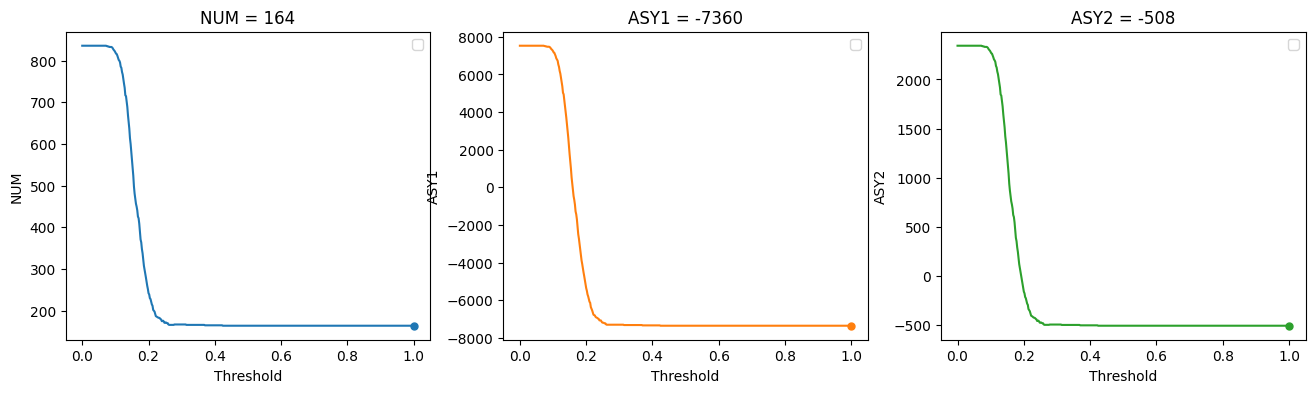

In [19]:
nb = GaussianNB()
num_thres, acy1_thres, acy2_thres = threshold_func(df.values, y.values[:, 0], nb)

100%|██████████| 501/501 [00:00<00:00, 695.37it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


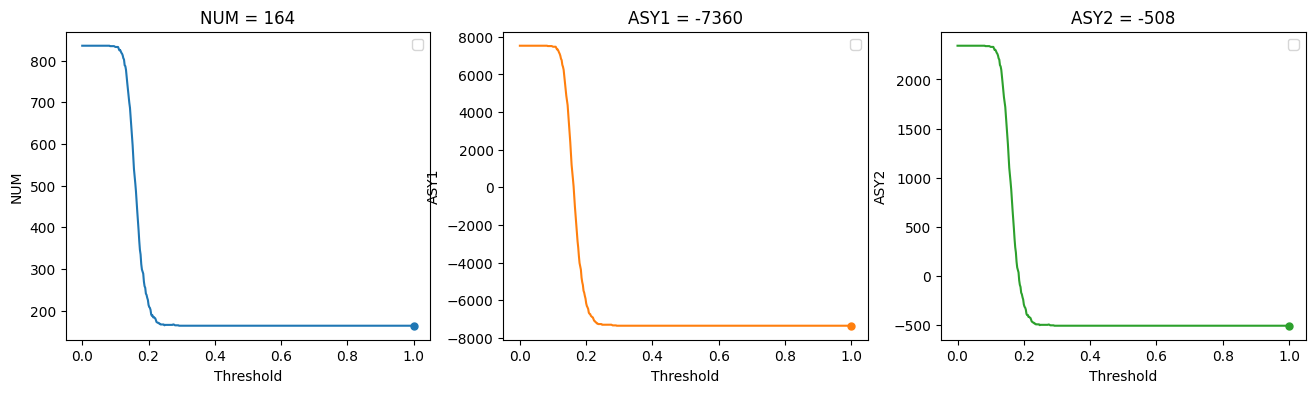

In [18]:
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', tol=1e-3, max_iter=2000)
num_thres, acy1_thres, acy2_thres = threshold_func(X[top_kulback[:1]].values, y.values[:, 0], lr)

In [22]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', tol=1e-3, max_iter=2000)
model.fit(df.values, y.values[:, 0])

LogisticRegression(max_iter=2000, multi_class='multinomial', tol=0.001)

In [20]:
model = GaussianNB()
model.fit(df.values, y.values[:, 0])

GaussianNB()

In [21]:
y_prob = model.predict_proba(df_test.values)
#y_prob = model.predict_proba(df_test.values)

answer = pd.DataFrame(columns=['AUC', 'NUM', 'ASY1', 'ASY2'])
answer['AUC'] = y_prob[:, 1]
answer['NUM'] = (y_prob[:,1] > num_thres).astype(int)
answer['ASY1'] = (y_prob[:,1] > acy1_thres).astype(int)
answer['ASY2'] = (y_prob[:,1] > acy2_thres).astype(int)

In [22]:
answer.to_csv('./answers/task1_4_ans.csv', index=False)